## 3. $H\rightarrow b\bar{b}$ via Machine Learning 

### 3.1 Importing libraries and loading 


In [1]:
import pandas as pd
from copy import deepcopy
from ucl_masterclass import *

from sklearn.preprocessing import scale
import tensorflow as tf
from tensorflow import keras
from time import time

# Read in the two datasets
df_even= pd.read_csv('../data-v1/VHbb_data_2jet_even.csv')
df_odd = pd.read_csv('../data-v1/VHbb_data_2jet_odd.csv')

### 3.2 Training Datasets 

The neural network is trained using a set of training events that have a label of 1 for signal and 0 for background. The dataset is split into *even* and *odd*, which you should use as you find most appriopriate.

In [5]:
# List of variables used in training
variables = ['dRBB','mBB','MET','Mtop','pTV',]

# Even events
x_even = scale(df_even[variables].values)
y_even = df_even['Class'].values
w_even = df_even['training_weight'].values

# Odd events
x_odd = scale(df_odd[variables].values)
y_odd = df_odd['Class'].values
w_odd = df_odd['training_weight'].values

### 3.3 Build a Simple Neural Network

Some simple code to train a very basic and sub-optimal NN, included to demonstrate how to evalute the performance and plot the output in Section 3.4.


In [6]:
start = time()
num_variables = len(variables)

# Define architecture 
def classifier():
    """
    Creates a model for higgs to bb classification
    
    returns: Keras model
    """
    
    model = keras.models.Sequential()
    
    # The input layer
    model.add(keras.layers.Dense(units=num_variables,input_dim = num_variables,activation='relu'))
    
    # Add hidden layers here
    # ======================

    # Output layer
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model


# Create and compile models
model_even = classifier()
model_odd = classifier()

# Set these parameters
# ====================
epochs = 1
batchSize = 5

# train
model_even.fit(x_even,y_even,sample_weight = w_even, epochs=epochs, batch_size=batchSize,verbose = 1)
model_odd.fit(x_odd,y_odd,sample_weight = w_odd, epochs=epochs, batch_size=batchSize,verbose = 1)

print("model trained in " + str(round(time()-start,2))+"s")

11747/11747 [==============================] - 5s 444us/step - loss: 116948.1094 - accuracy: 0.6238
model trained in 19.69s


### 3.4 Evaluating Neural Network

The code below will test a neural network on unseen events. In this case a neural network trained on the odd data set is tested on the even data set. The neural network is used to classify the events and calculate the sensitivity using the neural network output shown in the histogram below.



TrafoD 4
A sensitivity of 0.69 was achieved


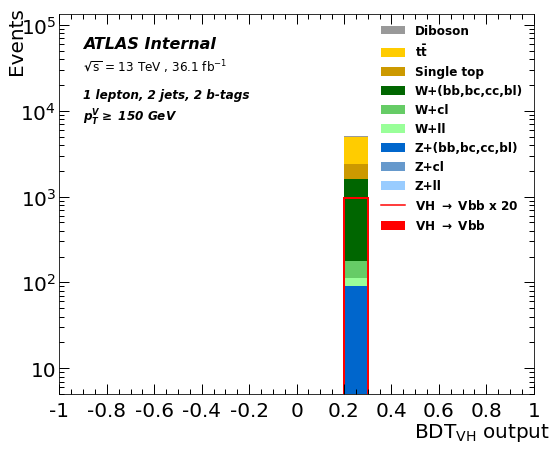

(<Figure size 612x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc15c31b880>)

In [7]:
df_odd['decision_value'] = model_even.predict(x_odd)
df_even['decision_value'] = model_odd.predict(x_even)
df = pd.concat([df_odd,df_even])
print("A sensitivity of", round(sensitivity_NN(df)[0],2),'was achieved')
nn_output_plot(df)

**This material was produced by hackingEducation**  
<img src="../docs/images/logo-black.png" width="50" align = 'left'/>